# **Basic approaches: Mean and Naive methods**

# Naive Method
In the Naive Method the previous observation is used to forecast the next one. It is therefore a very simple model that is purely used to compare the forecasts of more-advanced methods.

In [128]:
# Import the necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [129]:
# Import the dataset for the naive method
data_we = pd.read_csv("../Data/clean_data/weekly_data.csv")
data_we = data_we.dropna()

In [130]:
# Import the dataset for the naive method
data_mo = pd.read_csv("../Data/clean_data/monthly_data.csv")
data_mo = data_mo.dropna()

In [131]:
#Compute the errors 
from sklearn.metrics import mean_absolute_error as mae
import numpy as np
from sklearn.metrics import r2_score

def mean_errors(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    MAE = mae(actual, pred)
    MSE = np.square(np.subtract(actual,pred)).mean()
    MAPE = np.mean(np.abs((actual - pred) / actual)) * 100
    R2_score = r2_score(actual, pred)
    return print("MAE: {} \nMSE: {} \nMAPE: {} \nR2: {}".format(MAE, MSE, MAPE, R2_score))

# Naive method with weekly data

In [132]:
# convert DateTime column into datetime format
data_we["datetime"] = pd.to_datetime(data_we['datetime'])
# set DateTime as index
data_we.set_index("datetime", inplace=True)
data_we.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 412 entries, 2012-01-15 to 2019-12-01
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   412 non-null    float64
 1   suction_tension (40cm)   412 non-null    float64
 2   suction_tension (70cm)   412 non-null    float64
 3   water_temperature        412 non-null    float64
 4   barometric_pressure_qfe  412 non-null    float64
 5   dew_point                412 non-null    float64
 6   water_level              412 non-null    float64
 7   inflow_linth (m3/s)      412 non-null    float64
 8   outflow_limmat (m3/s)    412 non-null    float64
 9   precipitation (mm)       412 non-null    float64
 10  Evapotranspiration (mm)  412 non-null    float64
 11  change_rate              412 non-null    float64
dtypes: float64(12)
memory usage: 41.8 KB


In [133]:
dnaive = data_we.copy()
train_len = 259
dnaive_train = dnaive[0:train_len] # 2012 until end of 2016
dnaive_val = dnaive[train_len:364] # set for validation until end of 2018

In [134]:
validation_dnaive_test = dnaive_val.copy()
validation_dnaive_test['naive'] = dnaive_train['water_level'][train_len-1] # Validation part is calculated

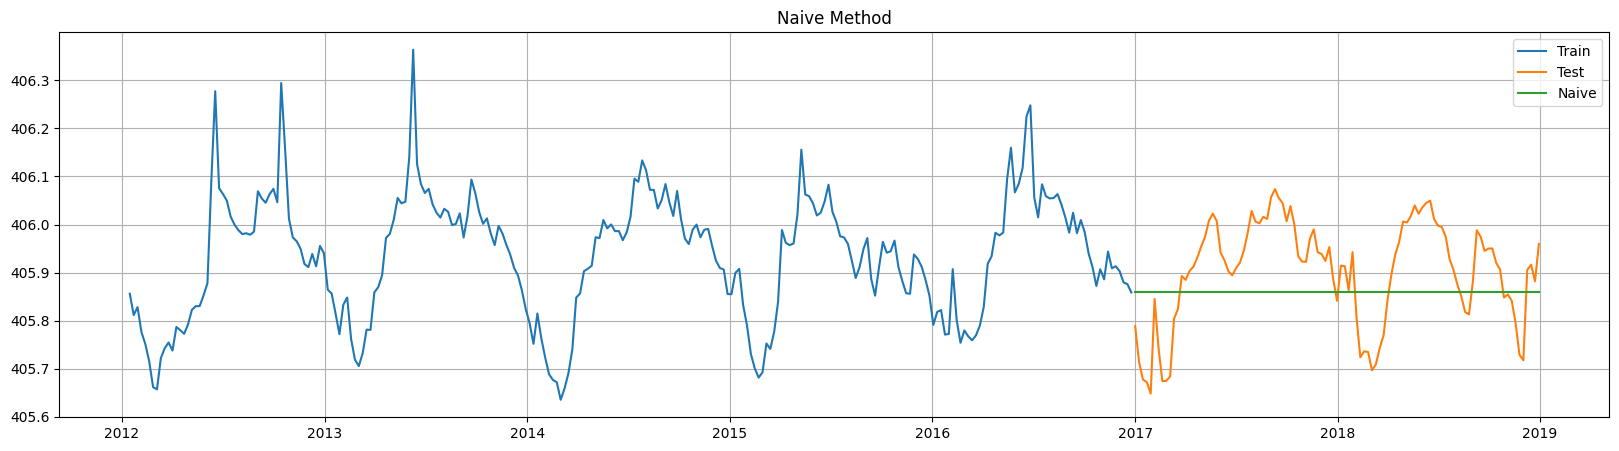

In [135]:
#Plot the train, the validation and the naive sets
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dnaive_train['water_level'], label='Train')
plt.plot(dnaive_val['water_level'], label='Test')
plt.plot(validation_dnaive_test['naive'], label='Naive')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [136]:
mean_errors(dnaive_val['water_level'], validation_dnaive_test['naive'])

MAE: 0.10097548185943121 
MSE: 0.01344894103234696 
MAPE: 0.024876157349545756 
R2: -0.1675246269110393


**Final testing for Naive method with weekly data**

In [156]:
dnaive_forecast = data_we.copy()
train_len = 364
dnaive_train = dnaive[0:train_len] # 2012-2018
dnaive_future = dnaive[train_len:] # Until the end of the dataset with the unseen data

In [157]:
future_dnaive = dnaive_future.copy()
future_dnaive['naive'] = dnaive_train['water_level'][train_len-1] # Prediction of the future values

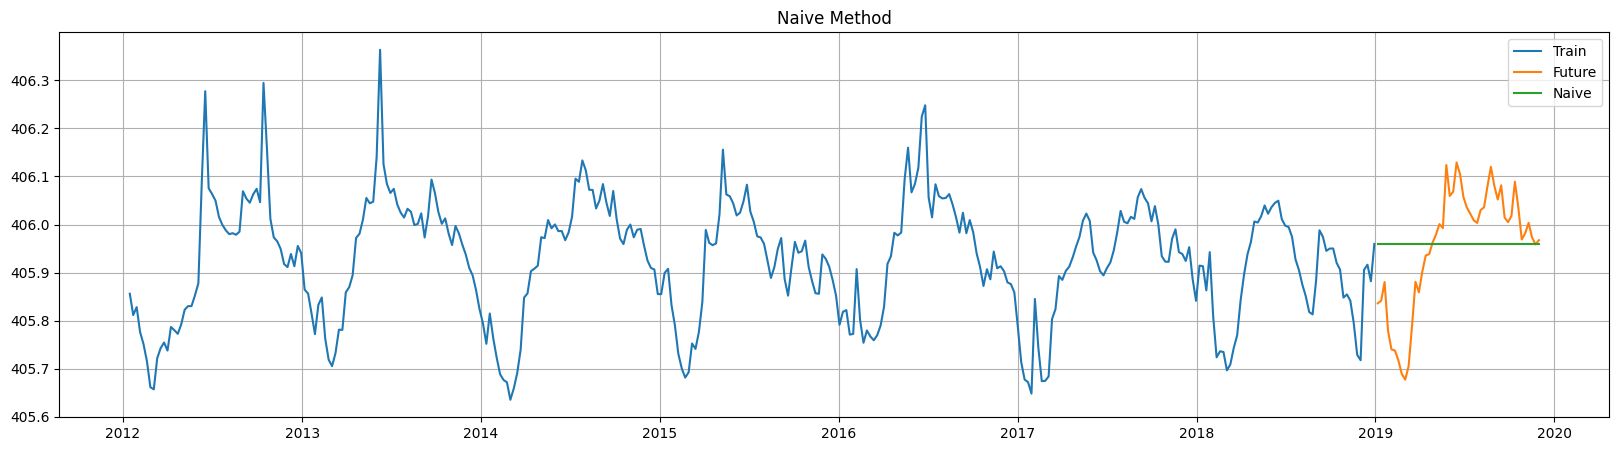

In [139]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dnaive_train['water_level'], label='Train')
plt.plot(dnaive_future['water_level'], label='Future')
plt.plot(future_dnaive['naive'], label='Naive')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [140]:
mean_errors(dnaive_future['water_level'], future_dnaive['naive'])

MAE: 0.09951948991400883 
MSE: 0.015376718419947843 
MAPE: 0.024517709078003075 
R2: -0.0003546544107242422


# Naive method with monthly data

In [141]:
# convert DateTime column into datetime format
data_mo["datetime"] = pd.to_datetime(data_mo['datetime'])
# set DateTime as index
data_mo.set_index("datetime", inplace=True)
data_mo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2012-02-29 to 2019-11-30
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   94 non-null     float64
 1   suction_tension (40cm)   94 non-null     float64
 2   suction_tension (70cm)   94 non-null     float64
 3   water_temperature        94 non-null     float64
 4   barometric_pressure_qfe  94 non-null     float64
 5   dew_point                94 non-null     float64
 6   water_level              94 non-null     float64
 7   inflow_linth (m3/s)      94 non-null     float64
 8   outflow_limmat (m3/s)    94 non-null     float64
 9   precipitation (mm)       94 non-null     float64
 10  Evapotranspiration (mm)  94 non-null     float64
 11  change_rate              94 non-null     float64
dtypes: float64(12)
memory usage: 9.5 KB


In [142]:
dnaive_mo = data_mo.copy()
train_len_mo = 59
dnaive_train_mo = dnaive_mo[0:train_len_mo] # 2012 until end of 2016
dnaive_val_mo = dnaive_mo[train_len_mo:83] # set for validation until end of 2018

In [143]:
validation_dnaive_test_mo = dnaive_val_mo.copy()
validation_dnaive_test_mo['naive'] = dnaive_train_mo['water_level'][train_len_mo-1] # Forecasted validation part is calculated

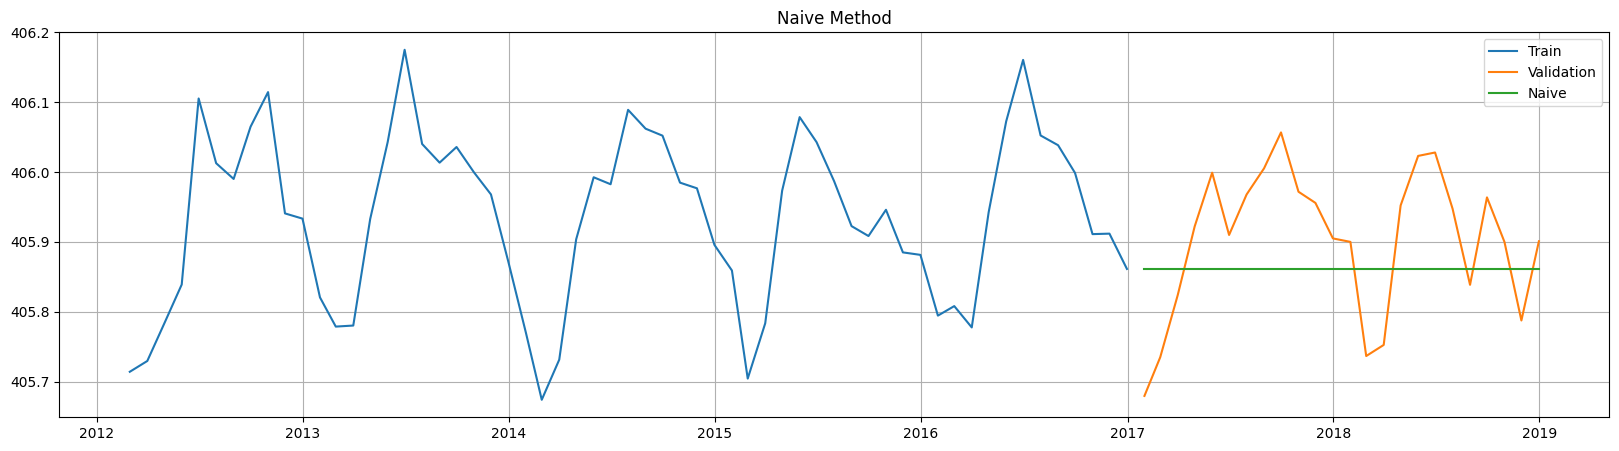

In [144]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dnaive_train_mo['water_level'], label='Train')
plt.plot(dnaive_val_mo['water_level'], label='Validation')
plt.plot(validation_dnaive_test_mo['naive'], label='Naive')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [145]:
mean_errors(dnaive_val_mo['water_level'], validation_dnaive_test_mo['naive'])

MAE: 0.09762561110579782 
MSE: 0.01195637740599971 
MAPE: 0.02405091244334425 
R2: -0.16679465292557016


**Final testing with monthly data**

In [159]:
dnaive_mo_fc = data_mo.copy()
train_len_mo_fc = 83
dnaive_train_mo_fc = dnaive_mo[0:train_len_mo_fc] # 2012 until end of 2018
dnaive_val_mo_fc = dnaive_mo[train_len_mo_fc:] # test until end of 2019

In [163]:
future_dnaive_mo = dnaive_val_mo_fc.copy()
future_dnaive_mo['naive'] = dnaive_train_mo_fc['water_level'][train_len_mo_fc-1] # Prediction of the future values

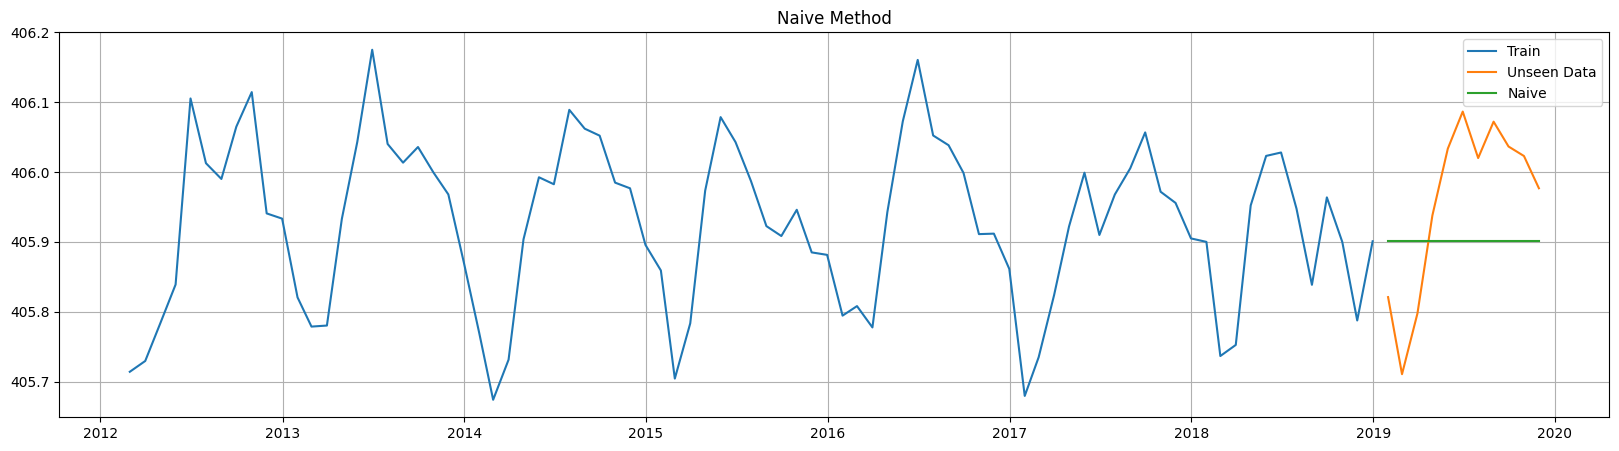

In [165]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dnaive_train_mo_fc['water_level'], label='Train')
plt.plot(dnaive_val_mo_fc['water_level'], label='Unseen Data')
plt.plot(future_dnaive_mo['naive'] , label='Naive')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [166]:
mean_errors(dnaive_val_mo_fc['water_level'], future_dnaive_mo['naive'])

MAE: 0.12296768530153589 
MSE: 0.017205053276286752 
MAPE: 0.030290438646821793 
R2: -0.21374171395141772


#  Mean method
This is another basic approach, where the average of the previous data is used as a forecast.

In [ ]:
dmean = data.copy()

In [ ]:
train_len = 237
dmean_train = dmean[0:train_len] 
dmean_test = dmean[train_len:284]

In [ ]:
validation_dmean_test = dmean_test.copy()
validation_dmean_test['mean'] = dmean_train["water_level"].mean() # The mean of the historical data is taken into consideration.

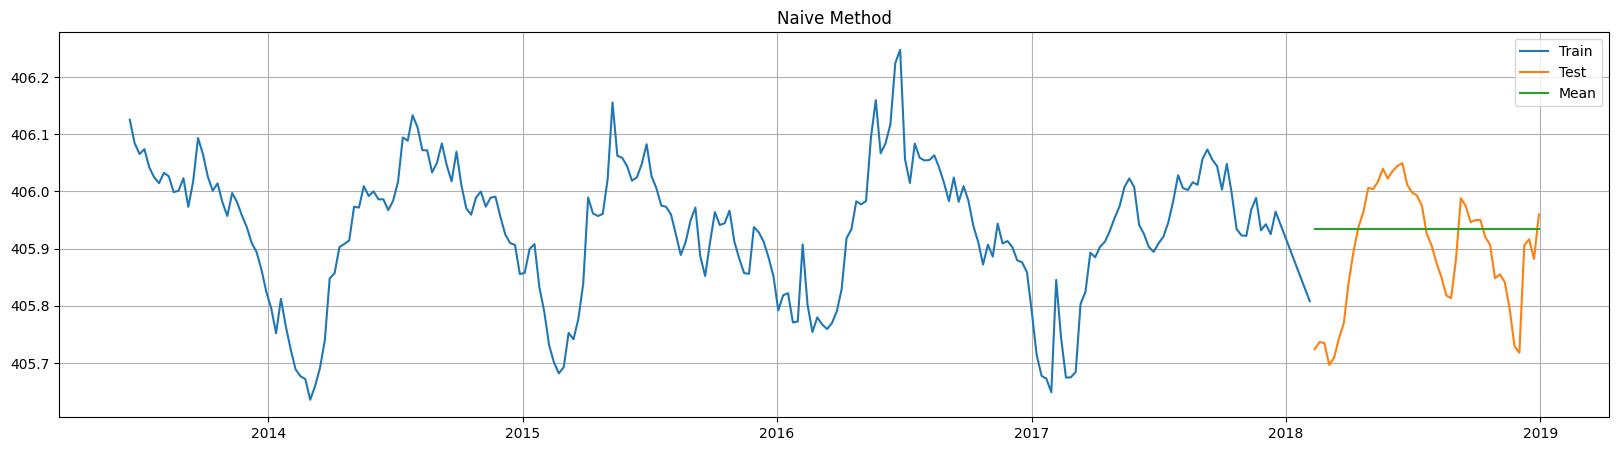

In [ ]:
#Plot the validation, the test and the mean.
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dmean_train['water_level'], label='Train')
plt.plot(dmean_test['water_level'], label='Test')
plt.plot(validation_dmean_test['mean'], label='Mean')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [ ]:
mean_errors(dmean_test['water_level'], validation_dmean_test['mean']) # Caluclate errors.

MAE: 0.08863543254970656 
MSE: 0.012216454286020504 
MAPE: 0.021839924079268987 
R2: -0.13544947690159992


**Now let's do the same but for 2019 onwards.**

In [ ]:
train_len = 284
dmean_train = dmean[0:train_len] 
dmean_test = dmean[train_len:]

In [ ]:
validation_dmean_future = dmean_test.copy()
validation_dmean_future['mean'] = dmean_train["water_level"].mean()

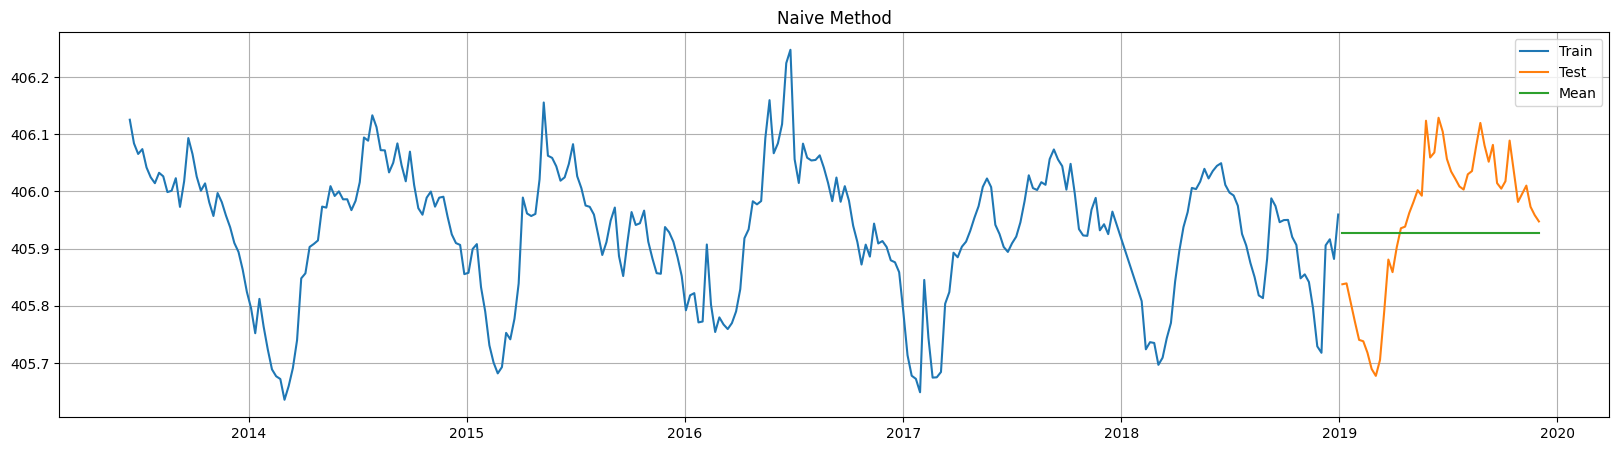

In [ ]:
#Plot the validation, the test and the future.
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(dmean_train['water_level'], label='Train')
plt.plot(dmean_test['water_level'], label='Test')
plt.plot(validation_dmean_future['mean'], label='Mean')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [ ]:
mean_errors(dmean_test['water_level'], validation_dmean_future['mean']) #Calculate the errors.

MAE: 0.11373309955455299 
MSE: 0.01691996320785375 
MAPE: 0.02801706210457316 
R2: -0.05856241389418715
